<a href="https://colab.research.google.com/github/AlyssaPh/-MAT-421/blob/main/ProjectPlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION TO THE PROBLEM**

Heart disease is one of the leading causes of death in the United States, accounting for approximately 1 in every 4 deaths. Early detection and analysis of risk factors can significantly reduce mortality rates. This project aims to analyze a heart disease dataset to identify key risk factors, predict the likelihood of heart disease, and provide actionable insights for healthcare professionals and policymakers.

**EXPLORATION DATA ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.svm import SVC
import seaborn as sns
# CSV of heart disease data set
url = 'https://raw.githubusercontent.com/AlyssaPh/-MAT-421/refs/heads/main/heart_Disease.csv'
df = pd.read_csv(url)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(303, 14)

In [ ]:
# Set display options to ensure the DataFrame is displayed as a single table
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping
pd.set_option('display.width', 1000)  # Increase display width

# Print the DataFrame
print(df.head(5))
print(df.tail(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2   41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3   56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4   57    0   0       120   354    0        1      163      1      0.6      2   0     2       1
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3       0
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3       0
300   68    1   0       144   193    1        1      141      0      3.4      1   2     3       0
301   57    1   0       130   13

In [ ]:
# check the Dataframe have ave duplicated value(s) which will affect to the prediction result
dp_val = df.duplicated().any()
print(dp_val)

True


In [ ]:
# remove the deuplicated value(s)
df = df.drop_duplicates()
print(df.shape)

(302, 14)


**INDEPEDENT AND DEPENDENT VARIABLES**

In [ ]:
# check the distribution of Target Variable
df['target'].value_counts()

,count
target,
1,164
0,138


1 --> Have heart disease

0 --> Do not have heart disease

In [ ]:
# slip the target variable as dependent variable for predicting the model
X = df.drop(columns = 'target', axis = 1)
y = df['target']
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3
300   68    1   0       144   193    1        1      141      0      3.4      1   2     3
301   57    1   0       130   131    0        1      115      1      1.2      1   1     3
302   57  

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

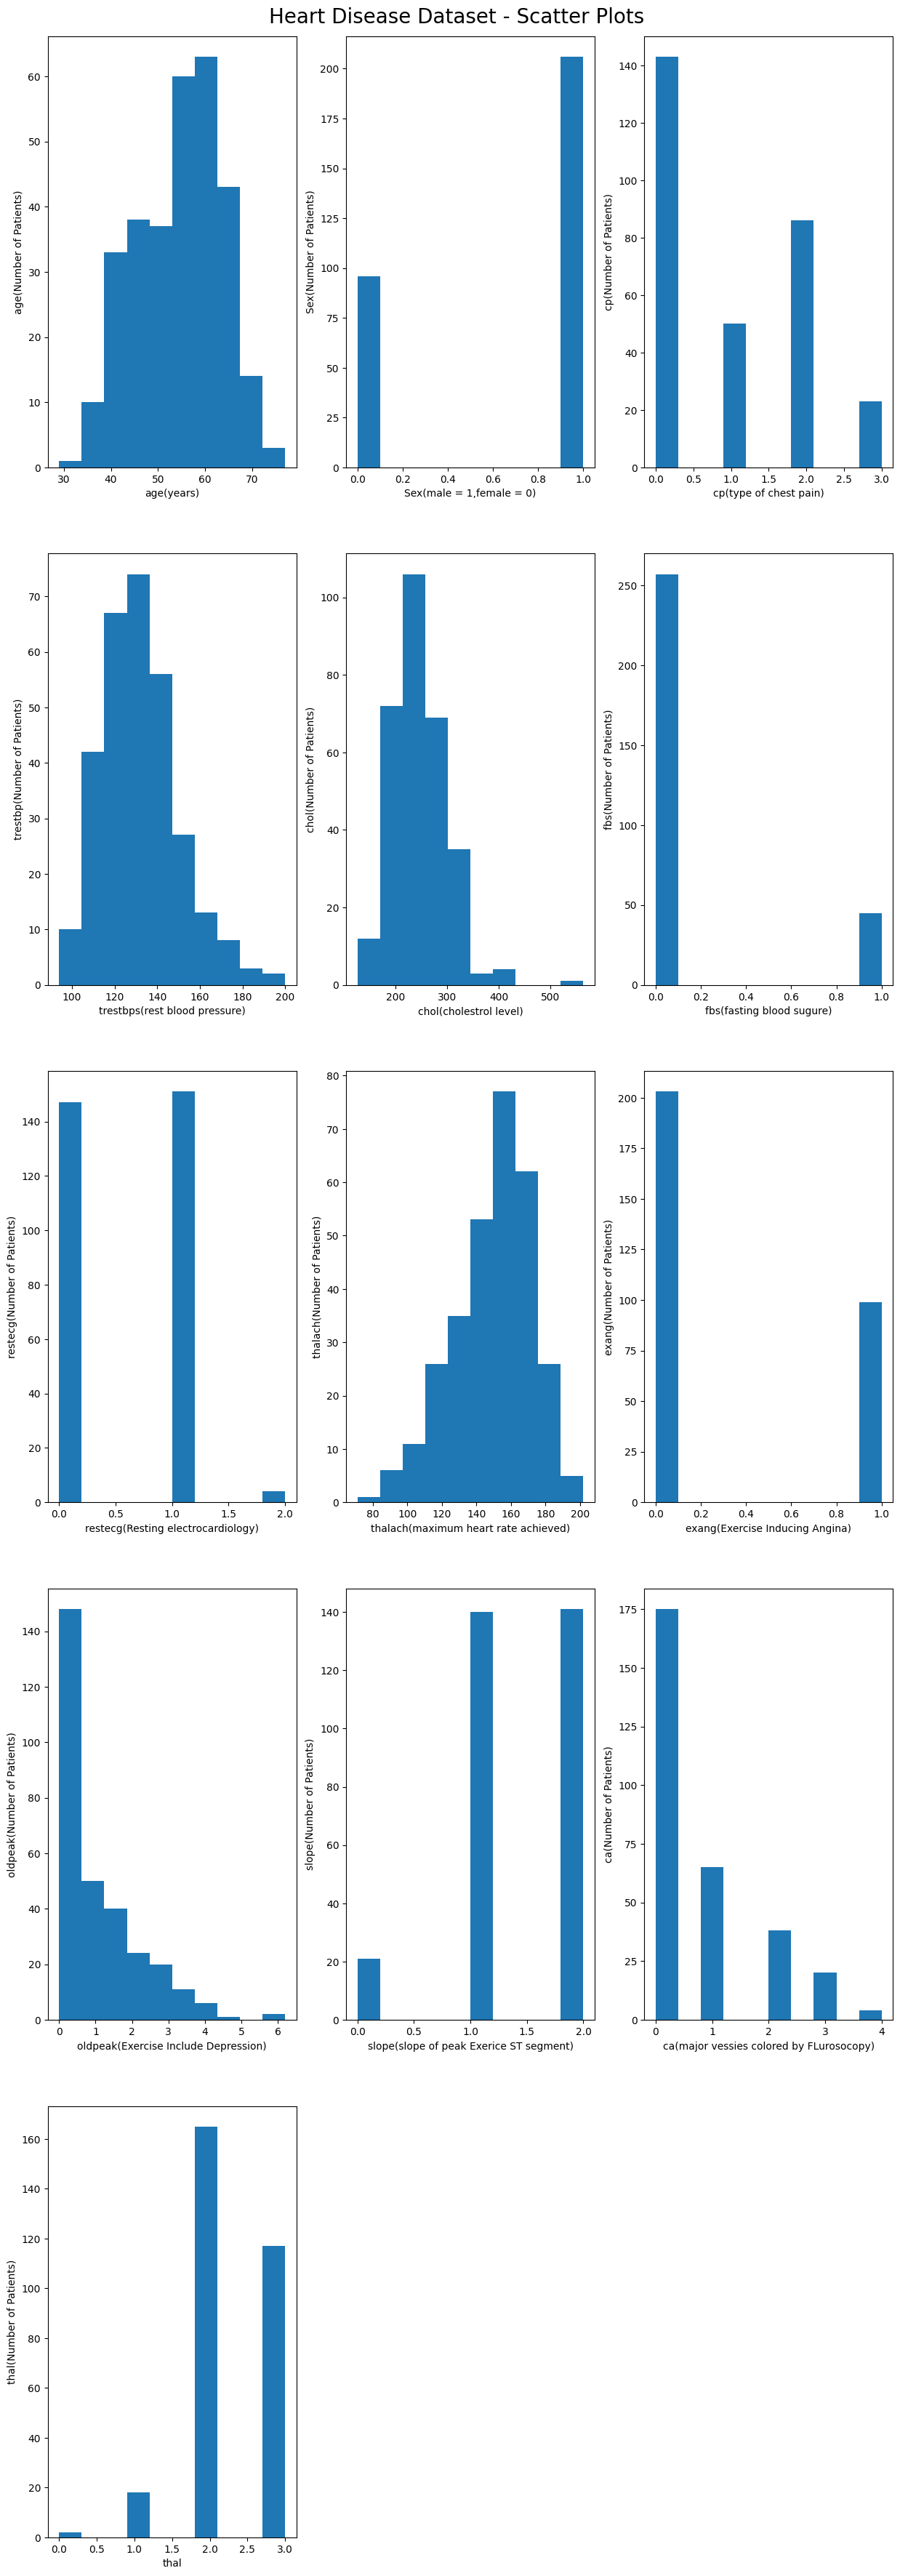

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 40))
plt.subplots_adjust(wspace=0.20, hspace=0.20, top=0.97)
plt.suptitle("Heart Disease Dataset - Scatter Plots", fontsize=20)

axes[0,0].hist(df.age)
axes[0,0].set_xlabel("age(years)")
axes[0,0].set_ylabel("age(Number of Patients)")

axes[0,1].hist(df.sex)
axes[0,1].set_xlabel("Sex(male = 1,female = 0)")
axes[0,1].set_ylabel("Sex(Number of Patients)")

axes[0,2].hist(df.cp)
axes[0,2].set_xlabel("cp(type of chest pain)")
axes[0,2].set_ylabel("cp(Number of Patients)")

axes[1,0].hist(df.trestbps)
axes[1,0].set_xlabel("trestbps(rest blood pressure)")
axes[1,0].set_ylabel("trestbp(Number of Patients)")

axes[1,1].hist(df.chol)
axes[1,1].set_xlabel("chol(cholestrol level)")
axes[1,1].set_ylabel("chol(Number of Patients)")

axes[1,2].hist(df.fbs)
axes[1,2].set_xlabel("fbs(fasting blood sugure)")
axes[1,2].set_ylabel("fbs(Number of Patients)")

axes[2,0].hist(df.restecg)
axes[2,0].set_xlabel("restecg(Resting electrocardiology)")
axes[2,0].set_ylabel("restecg(Number of Patients)")

axes[2,1].hist(df.thalach)
axes[2,1].set_xlabel("thalach(maximum heart rate achieved)")
axes[2,1].set_ylabel("thalach(Number of Patients)")

axes[2,2].hist(df.exang)
axes[2,2].set_xlabel("exang(Exercise Inducing Angina)")
axes[2,2].set_ylabel("exang(Number of Patients)")

axes[3,0].hist(df.oldpeak)
axes[3,0].set_xlabel("oldpeak(Exercise Include Depression)")
axes[3,0].set_ylabel("oldpeak(Number of Patients)")

axes[3,1].hist(df.slope)
axes[3,1].set_xlabel("slope(slope of peak Exerice ST segment)")
axes[3,1].set_ylabel("slope(Number of Patients)")

axes[3,2].hist(df.ca)
axes[3,2].set_xlabel("ca(major vessies colored by FLurosocopy)")
axes[3,2].set_ylabel("ca(Number of Patients)")

axes[4,0].hist(df.thal)
axes[4,0].set_xlabel("thal")
axes[4,0].set_ylabel("thal(Number of Patients)")

axes[4,1].axis("off")
axes[4,2].axis("off")

In [ ]:
# split X and y into training and test data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 15)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, y_test.shape)

(302, 13) (211, 13) (91, 13) (91,)


**MECHANICS OF THE MODEL**

In [ ]:
# Fit the linear model
# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# train the model using training data sets
model.fit(X_train,y_train)
# predict on the test data
y_pred=model.predict(X_test)

In [ ]:
# Compute model slope and intercept
cdf = pd.DataFrame(model.coef_, X.columns, columns = ['Coef'])
print(cdf)

              Coef
age      -0.001236
sex      -0.139976
cp        0.107643
trestbps -0.001673
chol     -0.000184
fbs       0.043055
restecg   0.048459
thalach   0.002779
exang    -0.200546
oldpeak  -0.041849
slope     0.106022
ca       -0.131452
thal     -0.112316


In [ ]:
model.intercept_

np.float64(0.7383188221389987)

**The fitted regression model :**

y = 0.7383188221389987 - age(0.001236) - sex(   0.139976)  +
cp        (0.107643) -
trestbps (0.001673) -
chol     (0.000184) +
fbs       (0.043055) +
restecg   (0.048459) +
thalach   (0.002779) -
exang    (0.200546) -
oldpeak  (0.041849) +
slope     (0.106022) -
ca       (0.131452) -
thal     (0.112316)


This is a linear model

In [ ]:
# Predict Target by using the model
y_pred

array([ 1.14719984,  0.55423032,  0.33985735,  0.80416777,  0.98642251,
        0.66893063,  0.88703843,  0.84195338,  1.04011118,  0.72399781,
        0.86510651, -0.07674843,  0.98891058,  0.26573967,  0.22929439,
        0.14014464,  0.08547885,  0.43598661,  0.64154003,  0.91879202,
        0.91387405,  0.00772593,  0.97867876,  0.96555351,  0.6854673 ,
       -0.13757342,  0.43804946,  0.94282515,  1.16594663,  0.30049009,
        0.58758964,  0.05997554,  0.62264475,  1.17598027,  0.09783491,
        0.66535243,  0.07902058,  0.13586927,  0.74911056, -0.17193579,
        1.01719578,  0.89913294,  0.68025418,  0.63241011,  0.48768425,
        0.6934392 ,  0.21672401,  0.5392798 ,  0.25168621,  0.70681473,
       -0.36769852,  0.6511427 ,  0.38304956,  0.71365652, -0.28096624,
        0.55392686,  0.89348645,  0.7673273 ,  0.68382505,  0.65356712,
        1.16552677,  0.04689402,  0.65964001,  0.23681208,  0.94719028,
        0.49452195, -0.0131555 ,  0.96401358,  0.17569096,  0.14

In [ ]:
y_pred.shape

(91,)

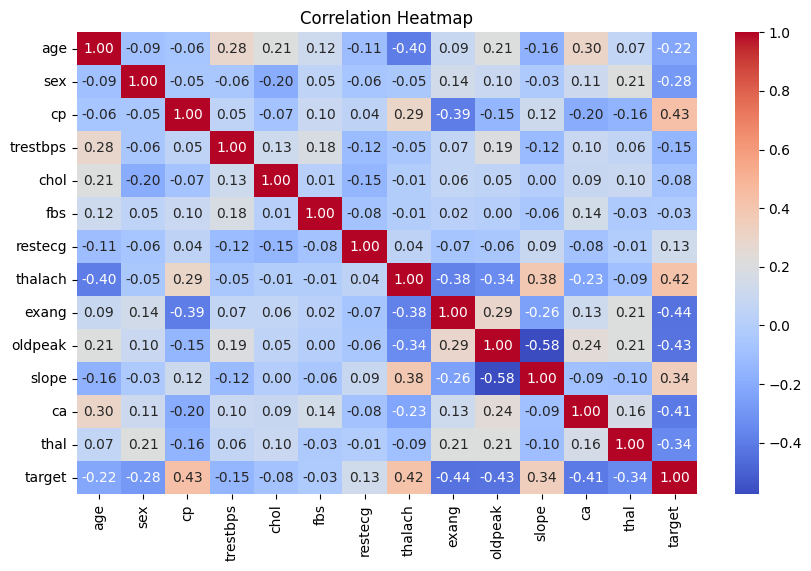

In [ ]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This correlation heatmap visually represents the relationships between different variables in our dataset, including the dependent variable (target) and the 12 independent variables. In the context of linear regression, this heatmap helps identify which independent variables are most strongly correlated with the target variable.


*   Stronger correlations (closer to -1 or 1) suggest a stronger linear relationship.

*   The feature "cp" (chest pain type) has a correlation of 0.43 with the target, indicating a moderate positive relationship, while "oldpeak" and "exang" have strong negative correlations (-0.43 and -0.44, respectively).



*   Multicollinearity Check: Features like "ca" and "thal" seem to be correlated with each other, which might affect the regression model's stability.


**REGRESSION METRICS FOR MODEL PERFORMANCE**

In [ ]:
# Calculate and print Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 0.3744


In [ ]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.4361


**RESIDUAL ANALYSIS**

In [ ]:
# compue residuals
residuals = y_test - y_pred
print(residuals)

62    -0.147200
34     0.445770
298   -0.339857
57     0.195832
154    0.013577
         ...   
230   -0.988557
66     0.380947
194   -0.657901
269    0.015461
218   -0.118917
Name: target, Length: 91, dtype: float64


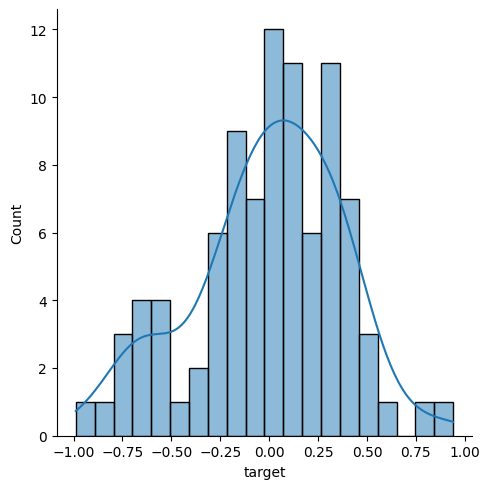

In [ ]:
sns.displot(residuals, bins = 20, kde = True)

In [ ]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: p-value = {p_value}")

if p_value > 0.05:
    print("Residuals are normally distributed (fail to reject the null hypothesis)")
else:
    print("Residuals are NOT normally distributed (reject the null hypothesis)")

Shapiro-Wilk Test: p-value = 0.08140688211682454
Residuals are normally distributed (fail to reject the null hypothesis)


The Normal shape distribution that our model's assumptions are likely satisfied and that the model is performing well.





**CHECKING FOR OVERFITTING AND UNDERFITTING**

In [ ]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format( model.score(X_train,y_train)))

print("Test set score: {:.4f}".format(model.score(X_test,y_test)))

Training set score: 0.5439
Test set score: 0.4361
